In [59]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import matplotlib
from pandas import DataFrame
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999
import xgboost as xgb
from sklearn.model_selection import KFold
from xgboost import XGBRegressor 

In [3]:
train=pd.read_csv("mertrain.csv")
test=pd.read_csv("mertest.csv")

In [4]:
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values) + list(test[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))
print('Shape train: {}\nShape test: {}'.format(train.shape, test.shape))

Shape train: (4209, 378)
Shape test: (4209, 377)


In [5]:
y = train['y'].values
y_mean = np.mean(y)
id_test = test['ID'].values
X = train.drop(['y'], axis=1).values
X_test= test.values

In [9]:
train_forvif=train
max_vif=2000
X2 = train_forvif.drop(['y'], axis=1).values
while max_vif > 10:
    X2=train_forvif.drop(['y'], axis=1).values
    num_columns2=X2.shape[1]
    vifs2=[variance_inflation_factor(X2, i) for i in range(0, num_columns2)]
    vif_df2=DataFrame(vifs2, columns=['VIF'])
    vif_df2['Feature']=train_forvif.drop(['y'], axis=1).columns
    vif_df2=vif_df2.replace([np.inf, -np.inf], np.nan).dropna(how='any')
    vif_df2=vif_df2.sort_values(ascending=False, by='VIF')
    max_vif=vif_df2.iloc[0,0]
    max_vif_columns=vif_df2.iloc[0,1]
    train_forvif=train_forvif.drop([max_vif_columns], axis=1) 
    print(max_vif_columns, max_vif)
    


C:\Users\chino\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\chino\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


X178 1139.90376948
X362 697.901886994
X331 308.299565393
X49 304.303049231
X238 302.143084348
X215 131.49017459
X161 111.920631993
X103 104.31774403
X329 69.3545859844
X328 51.8897405978
X356 39.5884482161
X246 39.3663383454
X85 38.9651082391
X45 36.717967592
X256 30.4918037066
X191 29.3634878705
X352 26.6806054881
X343 25.395872797
X179 23.9044878216
X355 21.5840309316
X43 20.2579069456
X272 17.057327305
X2 15.8924245472
X219 15.4052171617
X321 15.1622090401
X367 14.2140533589
X241 12.0312169325
X234 11.144847345
X57 10.4393230426
X150 10.0416991413
X197 9.73334781626


In [10]:
train_forvif.head()

,ID,y,X0,X1,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,0,3,27,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,4,3,31,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,2,3,30,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,24,21,5,3,30,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,5,3,14,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
val_columns=train_forvif.columns.values
val_columns=np.delete(val_columns,1)

In [63]:
test[val_columns].shape

(4209, 346)

In [64]:
vif_best=["X178", "X362", "X331", "X49", "X238", "X215", "X161", "X103",
 "X329", "X328", "X356", "X246","X85", "X45", "X256", "X191", "X352", "X343", "X179",
 "X355","X43","X272","X2","X219","X321" ,"X367" ,"X241" ,"X234" ,"X57" ,"X150" ,"X197"]

In [65]:
len(vif_best)

31

In [80]:
y = train_forvif['y'].values
y_mean = np.mean(y)
id_test = test['ID'].values
X = train_forvif.drop(['y'], axis=1).values
X_test= test[val_columns].values

In [67]:
kf=KFold(n_splits=10, shuffle=True, random_state=0)
kf.get_n_splits(X)

10

In [68]:
for train_index, test_index in kf.split(X):
    X_train, y_train=X[train_index], y[train_index]
    X_valid, y_valid=X[test_index], y[test_index]

In [69]:
estimator = XGBRegressor(base_score=100.66931812782134, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=1, gamma=1.0,
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=2,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=1.0,
       reg_lambda=1.0, scale_pos_weight=1, seed=None, silent=False,
       subsample=0.8)

In [70]:
estimator.fit(X_train, y_train)

XGBRegressor(base_score=100.66931812782134, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=1, gamma=1.0,
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=2,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=1.0,
       reg_lambda=1.0, scale_pos_weight=1, seed=None, silent=False,
       subsample=0.8)

In [72]:
print("R^2 valid: {: }".format(r2_score(y_valid, estimator.predict(X_valid))))
print("R^2 train: {: }".format(r2_score(y_train, estimator.predict(X_train))))

R^2 valid:  0.6022716478570618
R^2 train:  0.6005869260474945


In [81]:
y_pred=estimator.predict(X_test)

In [73]:
np.arange(31)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [77]:
r2_train=[]
r2_valid=[]

for i in np.arange(32):
    eliminate = vif_best[0:i]
    train_vif=train.drop(eliminate, axis=1)
    test_vif=test.drop(eliminate, axis=1)
    
    X = train_vif.drop(['y'], axis=1).values
    X_test= test_vif.values
    
    
    kf=KFold(n_splits=10, shuffle=True, random_state=0)
    kf.get_n_splits(X)
    
    for train_index, test_index in kf.split(X):
        X_train, y_train=X[train_index], y[train_index]
        X_valid, y_valid=X[test_index], y[test_index]
        
    model = XGBRegressor(base_score=100.66931812782134, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=1, gamma=1.0,
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=2,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=1.0,
       reg_lambda=1.0, scale_pos_weight=1, seed=None, silent=False,
       subsample=0.8)
   
    
    model.fit(X_train, y_train)
    
    r2_train.append(r2_score(y_train, model.predict(X_train)))
    r2_valid.append(r2_score(y_valid, model.predict(X_valid)))    

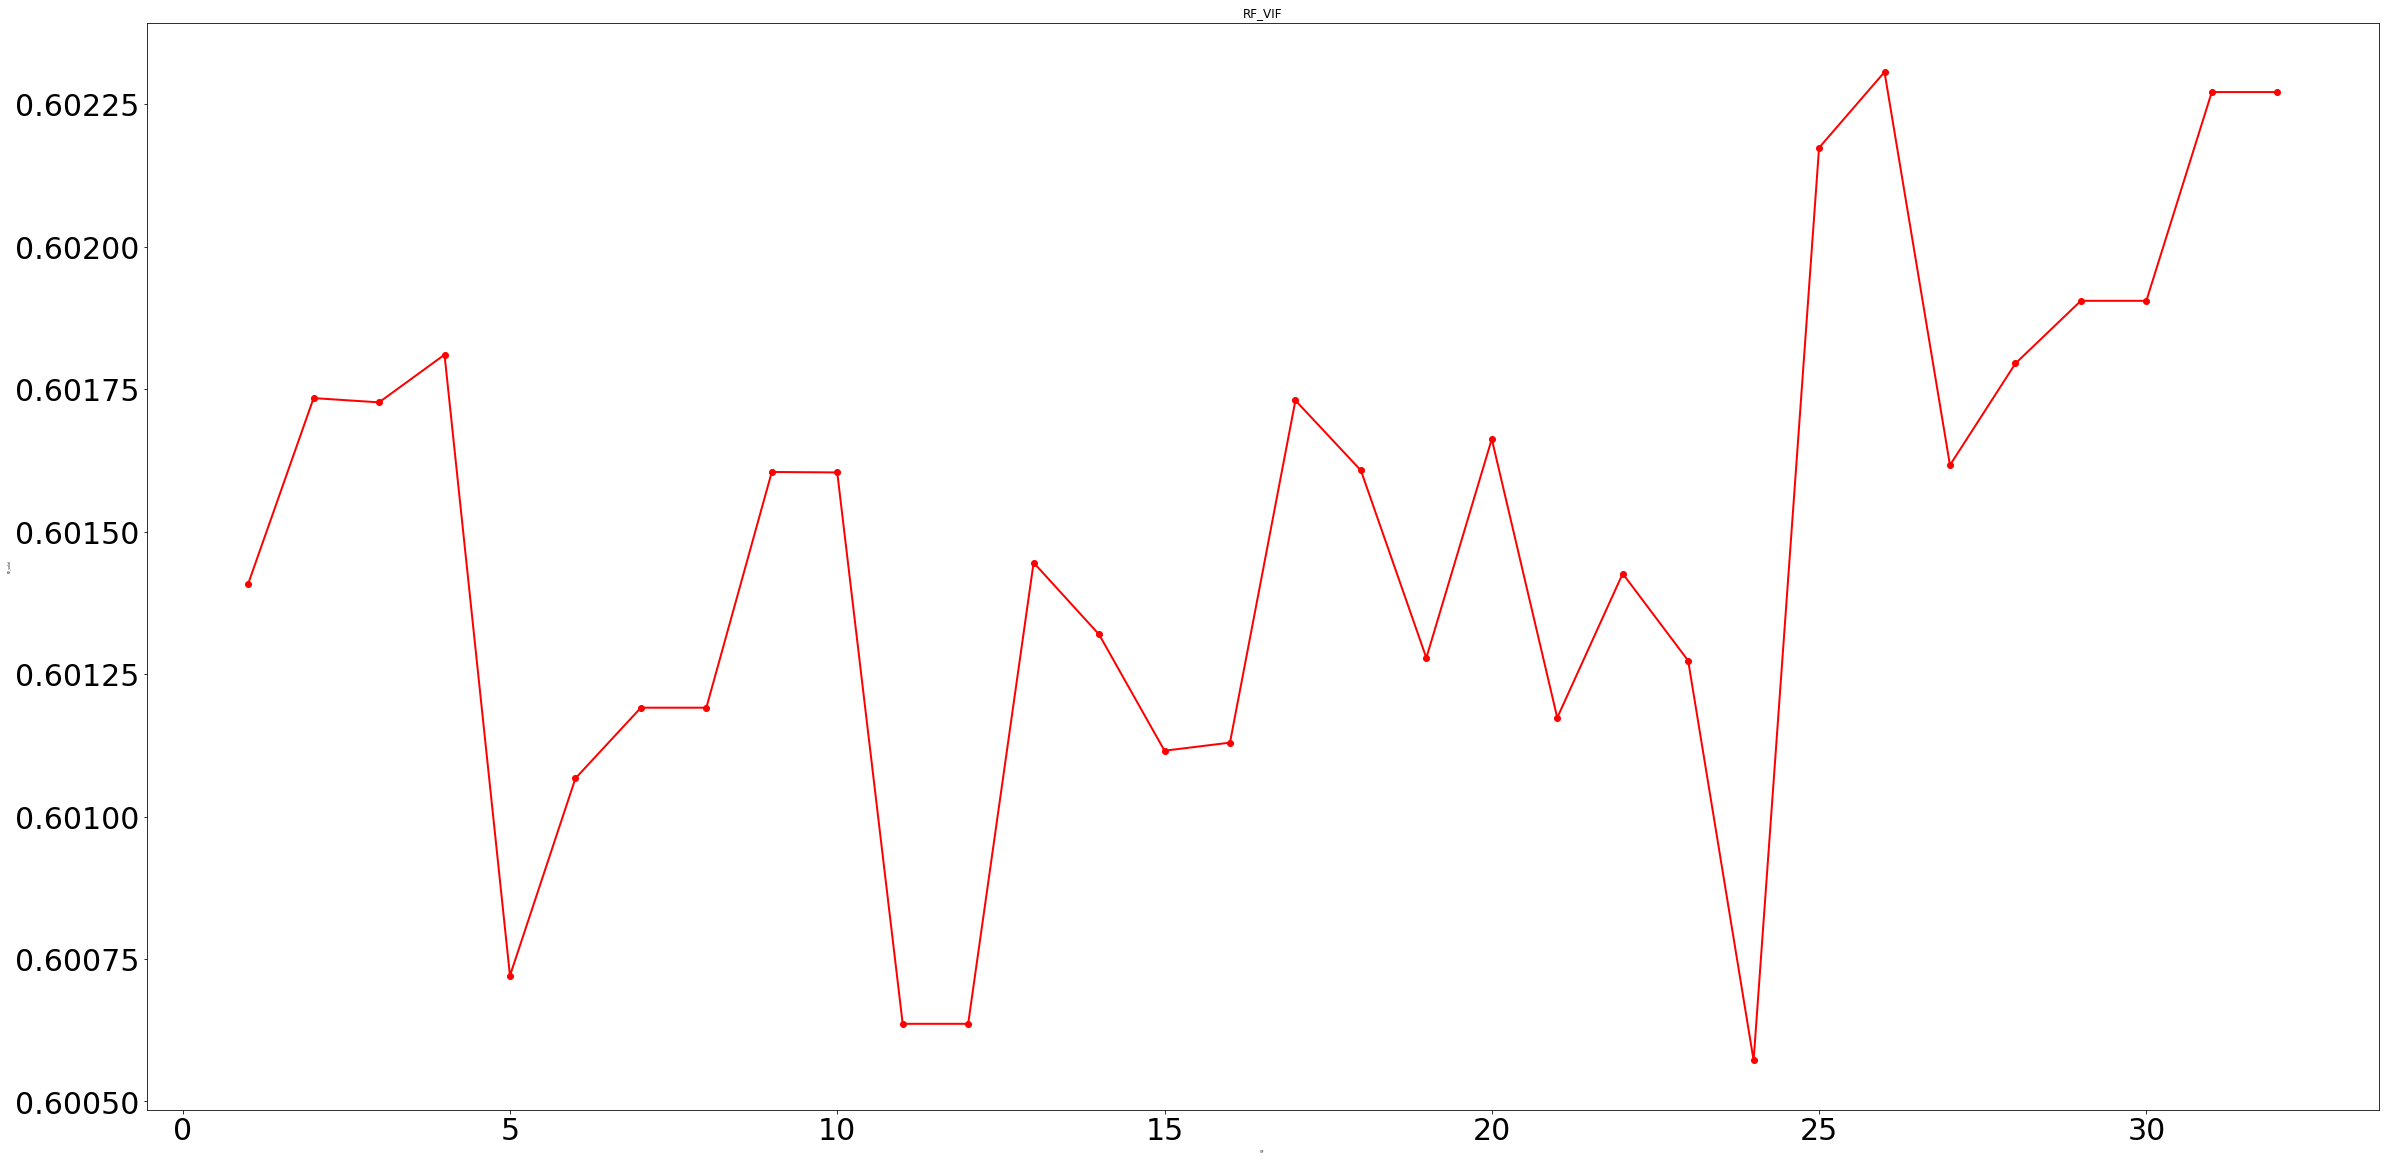

In [78]:
ig = plt.figure(figsize=(40,20))
sing_vals = np.arange(len(r2_valid) )+1
plt.plot(sing_vals, r2_valid, 'ro-', linewidth=2)
plt.title('RF_VIF')
plt.xlabel('VIF',fontsize=3)
plt.ylabel('R2_valid',fontsize=3)
plt.tick_params(labelsize=30)

plt.show()

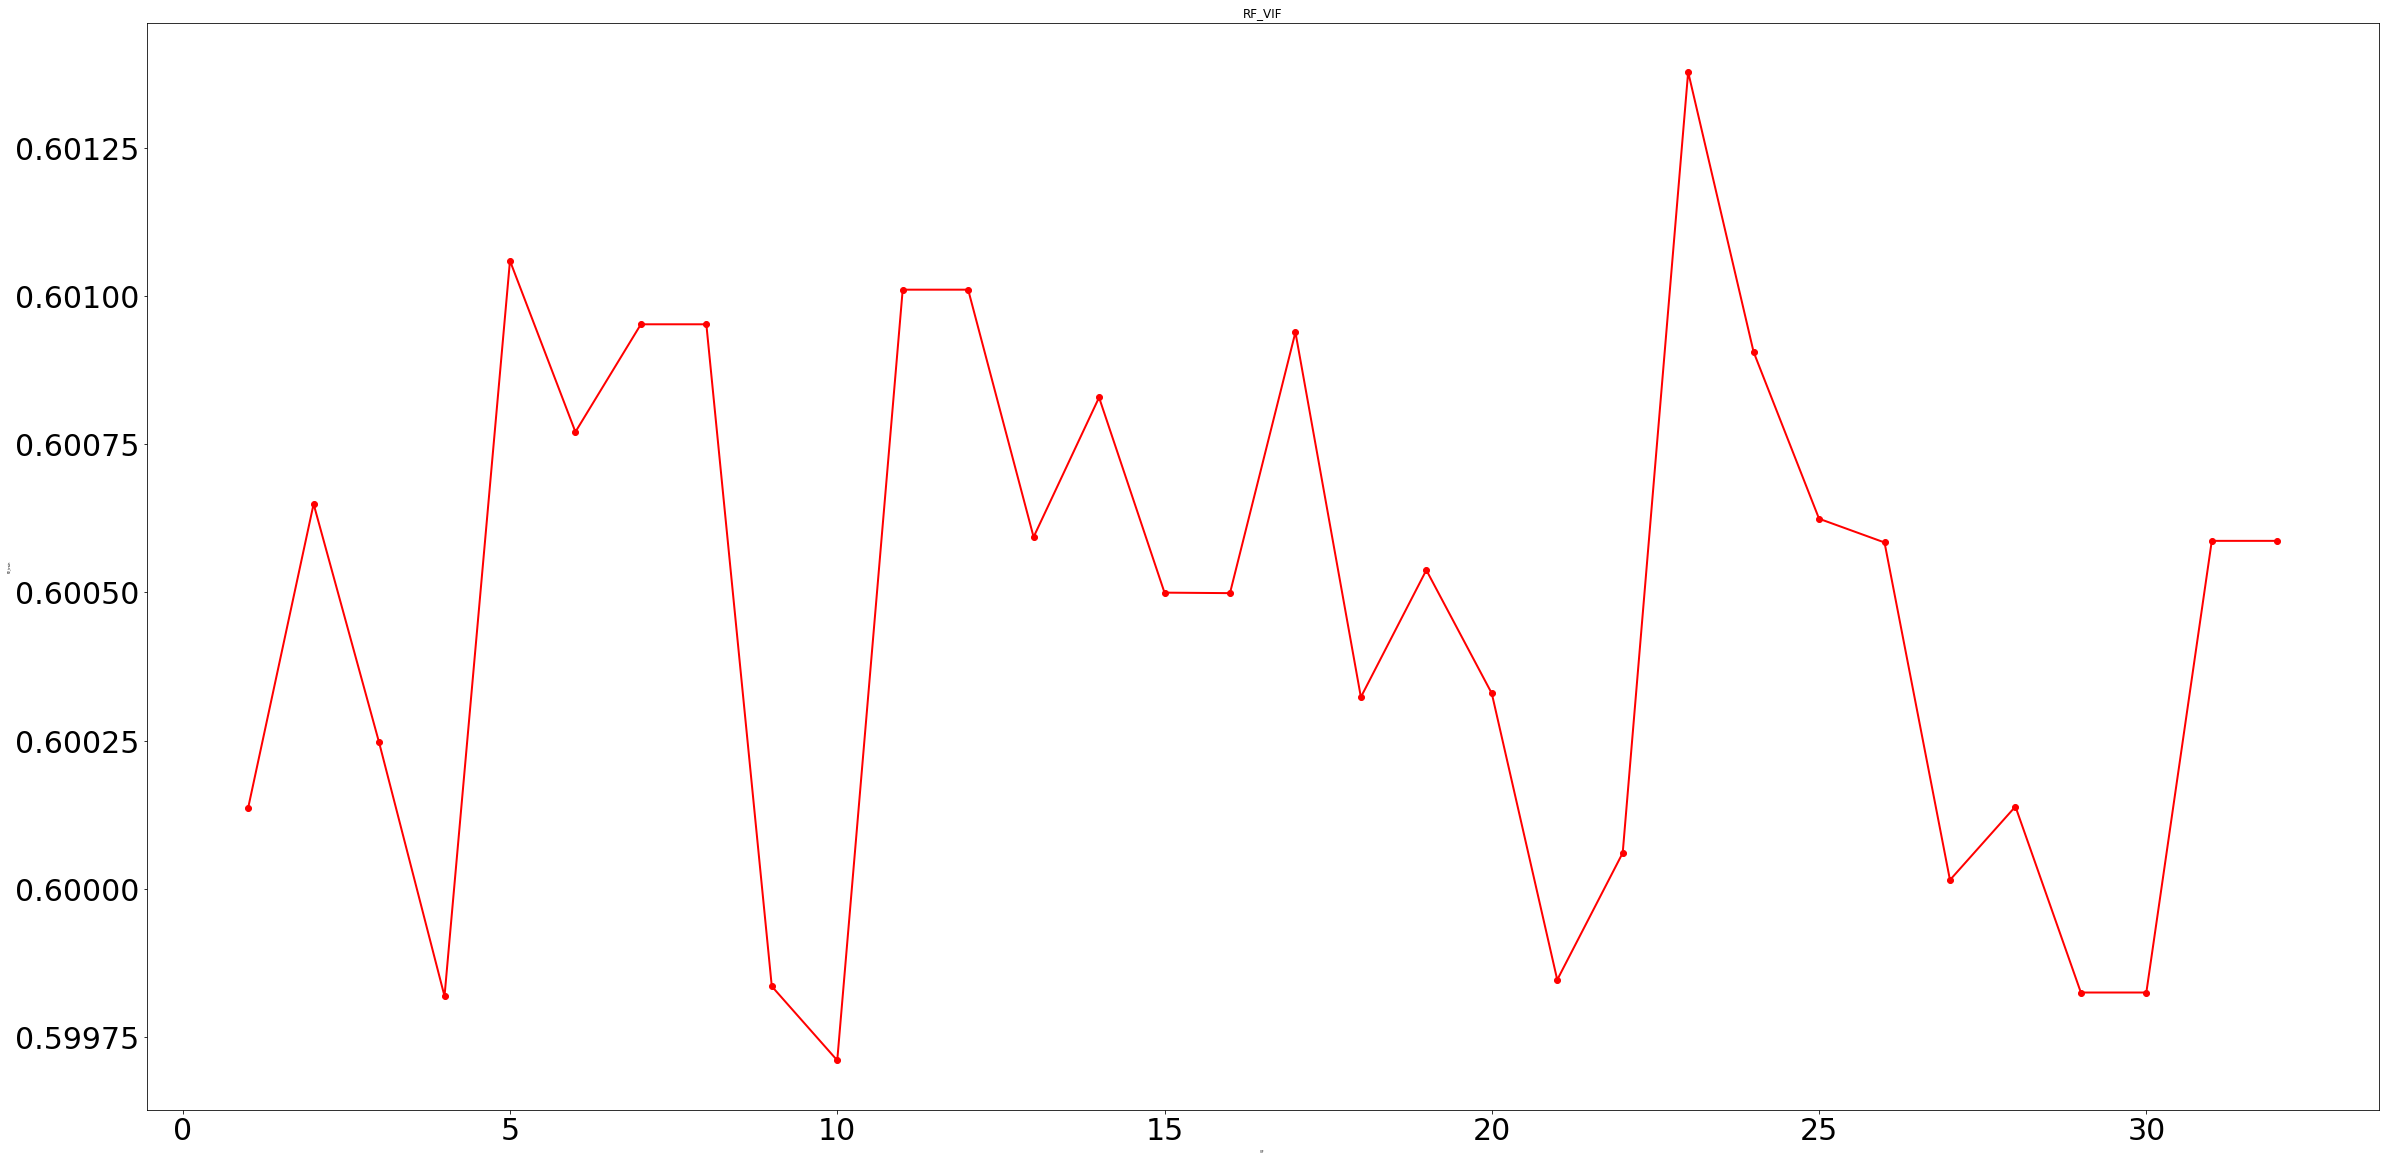

In [79]:
ig = plt.figure(figsize=(40,20))
sing_vals = np.arange(len(r2_train) )+1
plt.plot(sing_vals, r2_train, 'ro-', linewidth=2)
plt.title('RF_VIF')
plt.xlabel('VIF',fontsize=3)
plt.ylabel('R2_train',fontsize=3)
plt.tick_params(labelsize=30)

plt.show()

In [82]:
sub = pd.DataFrame()
sub['ID'] = id_test
sub['y'] = y_pred
sub.to_csv('xgb_bestvif.csv', index=False)